#### 查看 1.2.3.4期 表現

In [448]:
import pandas as pd

In [449]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.35.csv')
normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.35.csv')
normalized_train = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]
method_gene=pd.DataFrame(columns=['ID','Cluster'])
method_gene['ID']=['cg24848035','cg07792478','cg14502484','cg17152757','cg04574090','cg14231297']
normalized_train_c= normalized_train[normalized_train['Unnamed: 0'].isin(method_gene['ID'])]
normalized_test_c= normalized_test[normalized_test['Unnamed: 0'].isin(method_gene['ID'])]

In [450]:
def stage(stage_num):
    stage_train = pd.read_csv('../result/stage_train.csv')
    stage_test = pd.read_csv('../result/stage_test.csv')
    column_names_train = ['Unnamed: 0']
    column_names_test = ['Unnamed: 0']
    
    if stage_num==1:
        stage_train_num=stage_train[(stage_train['stage']=='Stage I') | (stage_train['stage']=='Stage IA') | 
                                (stage_train['stage']=='Stage IB')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage I') | (stage_test['stage']=='Stage IA') | 
                                (stage_test['stage']=='Stage IB')]
    elif stage_num==2:
        stage_train_num=stage_train[(stage_train['stage']=='Stage II') | (stage_train['stage']=='Stage IIA') | 
                                (stage_train['stage']=='Stage IIB')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage II') | (stage_test['stage']=='Stage IIA') | 
                                (stage_test['stage']=='Stage IIB')]
    elif stage_num==3:
        stage_train_num=stage_train[(stage_train['stage']=='Stage III') | (stage_train['stage']=='Stage IIIA') | 
                        (stage_train['stage']=='Stage IIIB') | (stage_train['stage']=='Stage IIIC')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage III') | (stage_test['stage']=='Stage IIIA') | 
                        (stage_test['stage']=='Stage IIIB') | (stage_test['stage']=='Stage IIIC')]
    elif stage_num==4:
        stage_train_num=stage_train[(stage_train['stage']=='Stage IV')]
        stage_test_num=stage_test[(stage_test['stage']=='Stage IV')]

    else:
        stage_train_num=stage_train[(stage_train['Sample_Group']=='Normal')]
        stage_test_num=stage_test[(stage_test['Sample_Group']=='Normal')]
        
    column_names_train.extend([str(i) for i in stage_train_num['Sample_Name']])
    stage_train_num = normalized_train_c[column_names_train]
    column_names_test.extend([str(i) for i in stage_test_num['Sample_Name']])
    stage_test_num = normalized_test_c[column_names_test]
    stage = pd.merge(stage_train_num, stage_test_num, on = "Unnamed: 0")
    return stage.iloc[:,1::2]

In [451]:
normal=stage(0) #正常 97人
stage_I=stage(1) #第1期 75人
stage_II=stage(2) #第2期 258人
stage_III=stage(3) #第3期 124人
stage_IV=stage(4) #第4期 6人
avg_normal=normal.mean(axis=1)
avg_stage_I=stage_I.mean(axis=1)
avg_stage_II=stage_II.mean(axis=1)
avg_stage_III=stage_III.mean(axis=1)
avg_stage_IV=stage_IV.mean(axis=1)
normal

,1_x,3_x,5_x,7_x,9_x,11_x,13_x,15_x,17_x,19_x,...,81_y,83_y,85_y,87_y,89_y,91_y,93_y,95,97,99
0,0.070534,0.045752,0.080296,0.170043,0.035935,0.112958,0.100397,0.197559,0.286658,0.040972,...,0.052142,0.044244,0.110479,0.393098,0.056976,0.055372,0.082757,0.040048,0.089752,0.083261
1,0.119963,0.081919,0.130510,0.203574,0.122578,0.157288,0.129305,0.143793,0.248650,0.090493,...,0.093155,0.205657,0.144601,0.451890,0.171679,0.138411,0.083704,0.126267,0.170187,0.151183
2,0.087862,0.034526,0.130081,0.138430,0.113358,0.213645,0.133462,0.183994,0.363293,0.092875,...,0.083035,0.229174,0.209257,0.449151,0.192985,0.303227,0.082785,0.236818,0.153444,0.134931
3,0.122214,0.050332,0.092202,0.136623,0.099212,0.136536,0.170099,0.270065,0.310733,0.127438,...,0.091619,0.155774,0.195668,0.424655,0.163945,0.271005,0.121081,0.159897,0.184464,0.149853
4,0.108353,0.053713,0.051112,0.104110,0.058999,0.077561,0.090645,0.137276,0.164802,0.081075,...,0.075695,0.086341,0.091345,0.380881,0.052674,0.059781,0.022968,0.057720,0.077632,0.074451
5,0.154898,0.029502,0.109519,0.117190,0.067192,0.086790,0.091699,0.296464,0.330753,0.081336,...,0.028114,0.135244,0.126664,0.367861,0.137746,0.084811,0.040157,0.111797,0.134944,0.306581


In [452]:
normal.columns=range(0,normal.shape[1])
normal = normal.T
normal_avg = normal.mean(skipna=True, axis=0)
print(normal_avg)

0    0.105626
1    0.166799
2    0.198661
3    0.191477
4    0.092377
5    0.148199
dtype: float64


In [453]:
def dbeta_tumor(stage):
    stage.columns=range(0,stage.shape[1])
    stage = stage.T
    dbeta_stage=(stage).subtract(normal_avg, axis = 1)
    return dbeta_stage

def cal_dbeta_normal(normal):
    normal.columns=range(0,normal.shape[1])
    dbeta_normal=(normal).subtract(normal_avg, axis = 1)
    return dbeta_normal

In [454]:
dbeta_normal=cal_dbeta_normal(normal)
dbeta_stage_I=dbeta_tumor(stage_I)
dbeta_stage_II=dbeta_tumor(stage_II)
dbeta_stage_III=dbeta_tumor(stage_III)
dbeta_stage_IV=dbeta_tumor(stage_IV)

#avg( Δβ (normal) ) 
avg_normaldBeta = dbeta_normal.mean(axis=0)
#avg( Δβ (tumor) ) 
avg_tumordBeta_I = dbeta_stage_I.mean(axis=0)
avg_tumordBeta_II = dbeta_stage_II.mean(axis=0)
avg_tumordBeta_III = dbeta_stage_III.mean(axis=0)
avg_tumordBeta_IV = dbeta_stage_IV.mean(axis=0)

# 標註hyper/hypo
normalized_train_c.reset_index(drop=True, inplace=True)
methylation_level_df = pd.DataFrame({'ID': normalized_train_c["Unnamed: 0"], 
                                     'Normal': avg_normal,
                                     'Stage_I': avg_stage_I,
                                     'Stage_II': avg_stage_II,
                                     'Stage_III': avg_stage_III,
                                     'Stage_IV': avg_stage_IV})
methylation_level_df.to_csv("../result/stage_perform.csv", index=False)

0    0.105626
1    0.166799
2    0.198661
3    0.191477
4    0.092377
5    0.148199
dtype: float64 0    0.474474
1    0.580368
2    0.621708
3    0.591161
4    0.428390
5    0.541674
dtype: float64


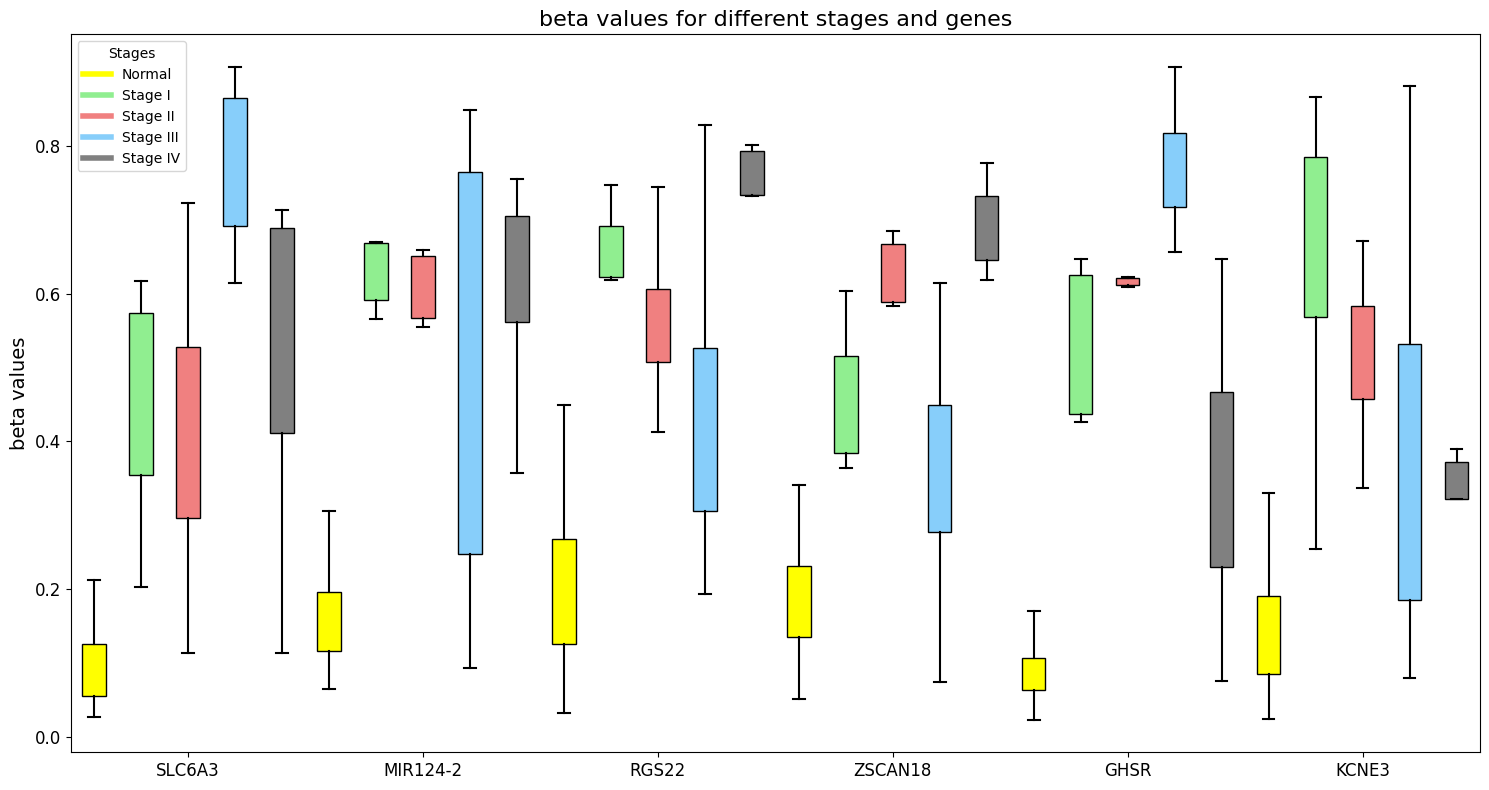

In [485]:
import pandas as pd
import matplotlib.pyplot as plt

normal_values = normal.values
stage_I_values = stage_I.values
stage_II_values = stage_II.values
stage_III_values = stage_III.values
stage_IV_values = stage_IV.values

data = []
labels = ['SLC6A3','MIR124-2','RGS22','ZSCAN18','GHSR','KCNE3']
num_columns = normal_values.shape[1]

for i in range(num_columns):
    data.append(normal_values[:, i])
    data.append(stage_I_values[:, i])
    data.append(stage_II_values[:, i])
    data.append(stage_III_values[:, i])
    data.append(stage_IV_values[:, i])
    # labels.append(f'{normalized_train_c["Unnamed: 0"][i]}')

fig, ax = plt.subplots(figsize=(15, 8))
boxplot = ax.boxplot(data, patch_artist=True)

colors = ['yellow', 'lightgreen', 'lightcoral', 'lightskyblue', 'gray']
for i in range(len(data)):
    boxplot['boxes'][i].set_facecolor(colors[i % 5])

for median in boxplot['medians']:
    median.set(color='red', linewidth=0)
for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in boxplot['caps']:
    cap.set(color='black', linewidth=1.5)
for flier in boxplot['fliers']:
    flier.set(marker='o', color='red', alpha=0)

positions = range(3, len(labels) * 5 + 1, 5)
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0, fontsize=12)

legend_handles = []
for color, stage in zip(colors, ['Normal', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']):
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=4, label=stage))

ax.legend(handles=legend_handles, title='Stages')

plt.title('beta values for different stages and genes', fontsize=16)
# plt.xlabel('Genes')
plt.ylabel('beta values', fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

SLC6A3
MIR124-2
RGS22
ZSCAN18
GHSR
KCNE3


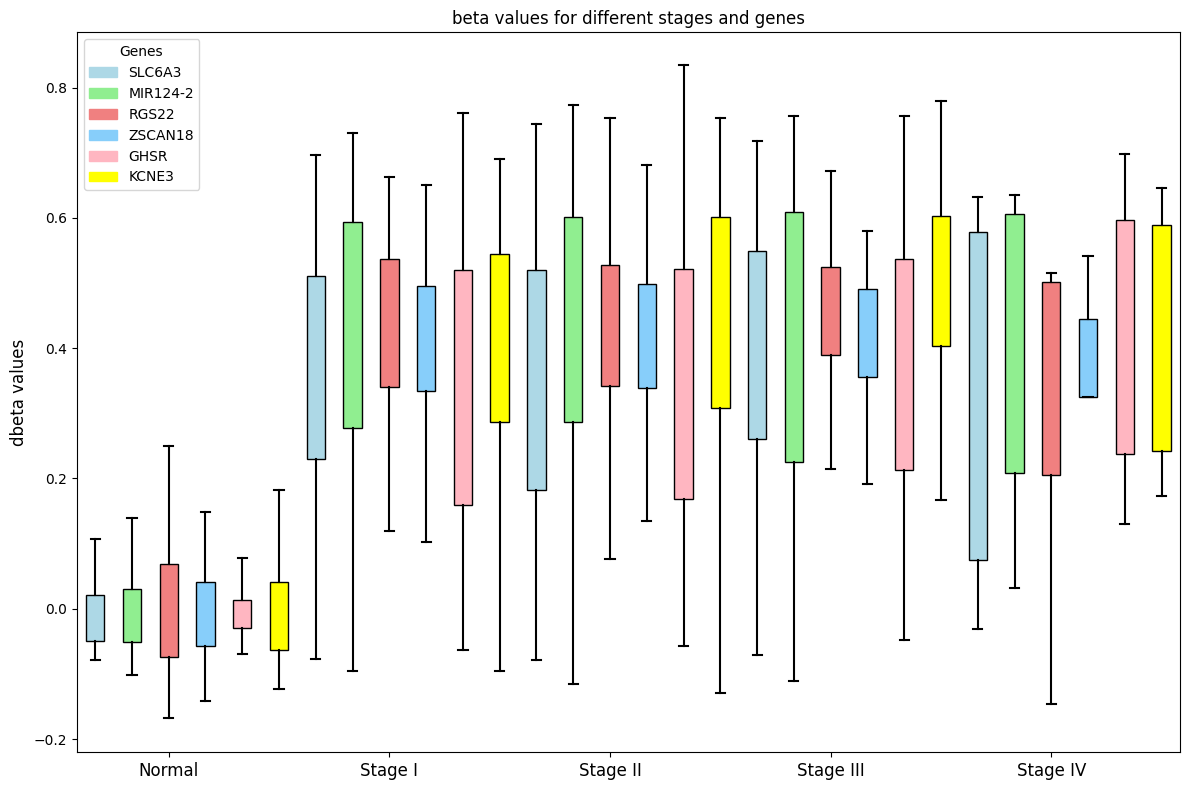

In [513]:

data = [normal_values[:, i] for i in range(normal_values.shape[1])] + \
       [stage_I_values[:, i] for i in range(stage_I_values.shape[1])] + \
       [stage_II_values[:, i] for i in range(stage_II_values.shape[1])] + \
       [stage_III_values[:, i] for i in range(stage_III_values.shape[1])] + \
       [stage_IV_values[:, i] for i in range(stage_IV_values.shape[1])]

gene_colors = {
    'SLC6A3': 'lightblue',
    'MIR124-2': 'lightgreen',
    'RGS22': 'lightcoral',
    'ZSCAN18': 'lightskyblue',
    'GHSR': 'lightpink',
    'KCNE3': 'yellow'
}

fig, ax = plt.subplots(figsize=(12, 8))
boxplot = ax.boxplot(data, patch_artist=True)
gene_list = ['SLC6A3','MIR124-2','RGS22','ZSCAN18','GHSR','KCNE3']
labels=['Normal', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

for i, gene in enumerate(gene_list):
    print(gene)
    gene_color = gene_colors.get(gene, 'gray')
    boxplot['boxes'][i].set_facecolor(gene_color)
    boxplot['boxes'][i+6].set_facecolor(gene_color)
    boxplot['boxes'][i+12].set_facecolor(gene_color)
    boxplot['boxes'][i+18].set_facecolor(gene_color)
    boxplot['boxes'][i+24].set_facecolor(gene_color)

for median in boxplot['medians']:
    median.set(color='red', linewidth=0)
for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in boxplot['caps']:
    cap.set(color='black', linewidth=1.5)
for flier in boxplot['fliers']:
    flier.set(marker='o', color='red', alpha=0)

legend_handles = []
for gene, color in gene_colors.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=gene))

ax.legend(handles=legend_handles, title='Genes')
positions = range(3, len(labels) * 6 + 1, 6)
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0, fontsize=12)

plt.title('beta values for different stages and genes')
plt.ylabel('dbeta values',fontsize=12)
plt.tight_layout()
plt.show()

#### 加入年齡

In [11]:
result=pd.read_csv("../result/stage_test.csv")
result["age"]=None
result

,Sample_Name,Sentrix_ID,Sentrix_Position,barcode,Sample_Group,stage,type,age
0,1,6005486013,R02C02,TCGA-A7-A0CE-11A-21D-A10Q-05,Normal,NaN,Solid Tissue Normal,None
1,2,6005486013,R02C02,TCGA-A7-A0CE-11A-21D-A10Q-05,Normal,NaN,Solid Tissue Normal,None
2,3,6005486013,R03C02,TCGA-BH-A0BV-11A-31D-A10Q-05,Normal,NaN,Solid Tissue Normal,None
3,4,6005486013,R03C02,TCGA-BH-A0BV-11A-31D-A10Q-05,Normal,NaN,Solid Tissue Normal,None
4,5,6005486011,R02C01,TCGA-BH-A0DZ-11A-22D-A10Q-05,Normal,NaN,Solid Tissue Normal,None
...,...,...,...,...,...,...,...,...
895,896,6042324005,R02C01,TCGA-E9-A22H-01A-11D-A161-05,Tumor,Stage IIB,Primary Tumor,None
896,897,6042324005,R04C01,TCGA-D8-A1X9-01A-12D-A161-05,Tumor,Stage IIA,Primary Tumor,None
897,898,6042324005,R04C01,TCGA-D8-A1X9-01A-12D-A161-05,Tumor,Stage IIA,Primary Tumor,None
898,899,6042324005,R05C01,TCGA-E2-A1LI-01A-12D-A161-05,Tumor,Stage IIB,Primary Tumor,None


In [12]:
phenotype=pd.read_csv('../external_result/TCGA.BRCA.sampleMap_BRCA_clinicalMatrix.csv')
for j in range(0,len(result)):
        for i in range(0,len(phenotype['_GENOMIC_ID_TCGA_BRCA_hMethyl450'])):

            if (str(result['barcode'][j])==str(phenotype['_GENOMIC_ID_TCGA_BRCA_hMethyl450'][i])):
                age=phenotype['age_at_initial_pathologic_diagnosis'][i]
                if age>=0:
                    result.loc[j,'age']=int(age)
                    break

result.to_csv("../result/stage_test.csv",index=False)

In [13]:
# 26~44 / 45~69 / 70~90
def stage_age(train,test):
    column_names_train = ['Unnamed: 0']
    column_names_test = ['Unnamed: 0']
    column_names_train.extend([str(i) for i in train['Sample_Name']])
    stage_train_num = normalized_train_c[column_names_train]
    column_names_test.extend([str(i) for i in test['Sample_Name']])
    stage_test_num = normalized_test_c[column_names_test]
    return pd.merge(stage_train_num, stage_test_num, on = "Unnamed: 0")

def stage(stage_num):
    stage_train = pd.read_csv('../result/stage_train.csv')
    stage_test = pd.read_csv('../result/stage_test.csv')
    
    if stage_num==1:
        stage_train_num=stage_train[(stage_train['stage']=='Stage I') | (stage_train['stage']=='Stage IA') | 
                                (stage_train['stage']=='Stage IB')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage I') | (stage_test['stage']=='Stage IA') | 
                                (stage_test['stage']=='Stage IB')]
    elif stage_num==2:
        stage_train_num=stage_train[(stage_train['stage']=='Stage II') | (stage_train['stage']=='Stage IIA') | 
                                (stage_train['stage']=='Stage IIB')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage II') | (stage_test['stage']=='Stage IIA') | 
                                (stage_test['stage']=='Stage IIB')]
    elif stage_num==3:
        stage_train_num=stage_train[(stage_train['stage']=='Stage III') | (stage_train['stage']=='Stage IIIA') | 
                        (stage_train['stage']=='Stage IIIB') | (stage_train['stage']=='Stage IIIC')]
        
        stage_test_num=stage_test[(stage_test['stage']=='Stage III') | (stage_test['stage']=='Stage IIIA') | 
                        (stage_test['stage']=='Stage IIIB') | (stage_test['stage']=='Stage IIIC')]
    elif stage_num==4:
        stage_train_num=stage_train[(stage_train['stage']=='Stage IV')]
        stage_test_num=stage_test[(stage_test['stage']=='Stage IV')]

    else:
        stage_train_num=stage_train[(stage_train['Sample_Group']=='Normal')]
        stage_test_num=stage_test[(stage_test['Sample_Group']=='Normal')]

    stage_train_age1=stage_train_num[(stage_train_num['age']<=44)]
    stage_train_age2=stage_train_num[(stage_train_num['age']>=45)&(stage_train_num['age']<=69)]
    stage_train_age3=stage_train_num[(stage_train_num['age']>=70)]

    stage_test_age1=stage_test_num[(stage_test_num['age']<=44)]
    stage_test_age2=stage_test_num[(stage_test_num['age']>=45)&(stage_test_num['age']<=69)]
    stage_test_age3=stage_test_num[(stage_test_num['age']>=70)]
    
    age1 = stage_age(stage_train_age1,stage_test_age1)
    age2 = stage_age(stage_train_age2,stage_test_age2)
    age3 = stage_age(stage_train_age3,stage_test_age3)
    return age1.iloc[:,1::2],age2.iloc[:,1::2],age2.iloc[:,1::2]


In [14]:
normal_age1,normal_age2,normal_age3=stage(0)
stage_I_age1,stage_I_age2,stage_I_age3=stage(1)
stage_II_age1,stage_II_age2,stage_II_age3=stage(2)
stage_III_age1,stage_III_age2,stage_III_age3=stage(3)
stage_IV_age1,stage_IV_age2,stage_IV_age3=stage(4)
avg_normal_age1=normal_age1.mean(axis=1)
avg_normal_age2=normal_age2.mean(axis=1)
avg_normal_age3=normal_age3.mean(axis=1)
avg_stage_I_age1=stage_I_age1.mean(axis=1)
avg_stage_I_age2=stage_I_age2.mean(axis=1)
avg_stage_I_age3=stage_I_age3.mean(axis=1)
avg_stage_II_age1=stage_II_age1.mean(axis=1)
avg_stage_II_age2=stage_II_age2.mean(axis=1)
avg_stage_II_age3=stage_II_age3.mean(axis=1)
avg_stage_III_age1=stage_III_age1.mean(axis=1)
avg_stage_III_age2=stage_III_age2.mean(axis=1)
avg_stage_III_age3=stage_III_age3.mean(axis=1)
avg_stage_IV_age1=stage_IV_age1.mean(axis=1)
avg_stage_IV_age2=stage_IV_age2.mean(axis=1)
avg_stage_IV_age3=stage_IV_age3.mean(axis=1)

In [15]:
def cal_normal_avg(normal):
    normal.columns=range(0,normal.shape[1])
    normal = normal.T
    normal_avg = normal.mean(skipna=True, axis=0)
    return normal_avg

normal_avg_age1=cal_normal_avg(normal_age1)
normal_avg_age2=cal_normal_avg(normal_age2)
normal_avg_age3=cal_normal_avg(normal_age3)

In [16]:
dbeta_normal_age1=cal_dbeta_normal(normal_age1)
dbeta_normal_age2=cal_dbeta_normal(normal_age2)
dbeta_normal_age3=cal_dbeta_normal(normal_age3)
dbeta_stage_I_age1=dbeta_tumor(stage_I_age1)
dbeta_stage_I_age2=dbeta_tumor(stage_I_age2)
dbeta_stage_I_age3=dbeta_tumor(stage_I_age3)
dbeta_stage_II_age1=dbeta_tumor(stage_II_age1)
dbeta_stage_II_age2=dbeta_tumor(stage_II_age2)
dbeta_stage_II_age3=dbeta_tumor(stage_II_age3)
dbeta_stage_III_age1=dbeta_tumor(stage_III_age1)
dbeta_stage_III_age2=dbeta_tumor(stage_III_age2)
dbeta_stage_III_age3=dbeta_tumor(stage_III_age3)
dbeta_stage_IV_age1=dbeta_tumor(stage_IV_age1)
dbeta_stage_IV_age2=dbeta_tumor(stage_IV_age2)
dbeta_stage_IV_age3=dbeta_tumor(stage_IV_age3)

#avg( Δβ (tumor) ) 
def avgdBeta(data_age1,data_age2,data_age3):
    data1=data_age1.mean(axis=0)
    data2=data_age2.mean(axis=0)
    data3=data_age3.mean(axis=0)
    return data1,data2,data3

avg_normaldBeta_age1,avg_normaldBeta_age2,avg_normaldBeta_age3 = avgdBeta(dbeta_normal_age1,dbeta_normal_age2,dbeta_normal_age3)
avg_tumordBeta_I_age1,avg_tumordBeta_I_age2,avg_tumordBeta_I_age3 = avgdBeta(dbeta_stage_I_age1,dbeta_stage_I_age2,dbeta_stage_I_age3)
avg_tumordBeta_II_age1,avg_tumordBeta_II_age2,avg_tumordBeta_II_age3 = avgdBeta(dbeta_stage_II_age1,dbeta_stage_II_age2,dbeta_stage_II_age3)
avg_tumordBeta_III_age1,avg_tumordBeta_III_age2,avg_tumordBeta_III_age3 = avgdBeta(dbeta_stage_III_age1,dbeta_stage_III_age2,dbeta_stage_III_age3)
avg_tumordBeta_IV_age1,avg_tumordBeta_IV_age2,avg_tumordBeta_IV_age3 = avgdBeta(dbeta_stage_IV_age1,dbeta_stage_IV_age2,dbeta_stage_IV_age3)

# 標註hyper/hypo
normalized_train_c.reset_index(drop=True, inplace=True)
methylation_level_age = pd.DataFrame({'ID': normalized_train_c["Unnamed: 0"], 
                                     'Normal,26~44': avg_normal_age1,
                                     'Normal,45~69': avg_normal_age2,
                                     'Normal,70~90': avg_normal_age3,
                                     'I,26~44': avg_stage_I_age1,
                                     'I,45~69': avg_stage_I_age2,
                                     'I,70~90': avg_stage_I_age3, 
                                     'II,26~44': avg_stage_II_age1,
                                     'II,45~69': avg_stage_II_age2,
                                     'II,70~90': avg_stage_II_age3,
                                     'III,26~44': avg_stage_III_age1,
                                     'III,45~69': avg_stage_III_age2,
                                     'III,70~90': avg_stage_III_age3,
                                     'IV,26~44': avg_stage_IV_age1,
                                     'IV,45~69': avg_stage_IV_age2,
                                     'IV,70~90': avg_stage_IV_age3})
methylation_level_age.to_csv("../result/stage_perform_age.csv", index=False)